In [1]:
import tensorflow as tf

class Model(object):
  def __init__(self):
    # Initialize the weights to `5.0` and the bias to `0.0`
    # In practice, these should be initialized to random values (for example, with `tf.random.normal`)
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.W * x + self.b

model = Model()

assert model(3.0).numpy() == 15.0


In [2]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)


In [137]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = [1000,3]

inputs  = tf.random.normal(shape=NUM_EXAMPLES)
#NUM_EXAMPLES
noise   = tf.random.normal(shape=NUM_EXAMPLES)
outputs = inputs * TRUE_W + TRUE_b + noise

In [158]:
inputs.shape

TensorShape([1000, 3])

In [152]:
multiple_outputs = tf.concat([outputs.numpy(), tf.square(outputs).numpy()], -1)
multiple_outputs_reshaped = np.reshape(multiple_outputs, [1000, 2, 3])
multiple_outputs_reshaped[:2]

array([[[ 1.8405806 ,  0.2507398 ,  3.6314328 ],
        [ 3.3877368 ,  0.06287045, 13.187304  ]],

       [[-1.1946479 ,  0.57950443,  2.8047597 ],
        [ 1.4271836 ,  0.33582538,  7.8666773 ]]], dtype=float32)

TensorShape([1000, 6])

In [77]:
outputs3[:2]

array([[-2.500147 ,  6.2507358],
       [ 5.682958 , 32.296013 ]], dtype=float32)

In [92]:
outputs4 = tf.concat([outputs2.numpy(), outputs2.numpy()], -1)
outputs4[:2].numpy()

array([[-2.500147, -2.500147],
       [ 5.682958,  5.682958]], dtype=float32)

In [107]:
tf.reduce_min(tf.abs(outputs3-outputs4).numpy(), axis=0).numpy()

array([0.        , 0.00115366], dtype=float32)

In [94]:
outputs4.shape

TensorShape([1000, 2])

In [98]:
outputs3.shape

TensorShape([1000, 2])

In [117]:
import numpy as np

INFINITY = tf.constant(np.infty)

In [156]:
inf_list = tf.reshape([INFINITY] * 3000, [1000, 1, 3])
outputs_with_infinity = tf.concat([multiple_outputs_reshaped, inf_list], 1)
outputs_with_infinity.numpy()

array([[[ 1.8405806 ,  0.2507398 ,  3.6314328 ],
        [ 3.3877368 ,  0.06287045, 13.187304  ],
        [        inf,         inf,         inf]],

       [[-1.1946479 ,  0.57950443,  2.8047597 ],
        [ 1.4271836 ,  0.33582538,  7.8666773 ],
        [        inf,         inf,         inf]],

       [[ 4.037521  ,  5.837267  , -1.2348932 ],
        [16.301575  , 34.073685  ,  1.5249612 ],
        [        inf,         inf,         inf]],

       ...,

       [[-4.4823494 , -2.4651752 ,  4.6584353 ],
        [20.091455  ,  6.0770884 , 21.70102   ],
        [        inf,         inf,         inf]],

       [[-0.44455844, -2.9205053 ,  0.58084714],
        [ 0.19763221,  8.529351  ,  0.33738342],
        [        inf,         inf,         inf]],

       [[ 1.6370213 ,  4.153522  ,  0.19025564],
        [ 2.6798387 , 17.251745  ,  0.03619721],
        [        inf,         inf,         inf]]], dtype=float32)

In [160]:
from matplotlib import pyplot as plt


#Tomar el minimo!
def loss(predicted_y, target_y):
    
    #target_y tiene 2 valores en cada columna
    duplicated_predicted_y = tf.concat([predicted_y] * 3, -1)
    
    #Hack que no entiendo por que lo necesito
    duplicated_predicted_y = tf.reshape(duplicated_predicted_y, [1000, 3, 3])
    distances = tf.abs(target_y - duplicated_predicted_y)
    print("distances", distances)
    mean_distance =  tf.reduce_mean(tf.reduce_min(distances, axis=1))
    print("mean distance", mean_distance)
    return mean_distance

model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(1)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs_with_infinity)

  train(model, inputs, outputs_with_infinity, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))



distances tf.Tensor(
[[[ 2.112401    1.40097     0.1266396 ]
  [ 3.6595573   1.2131007   9.429232  ]
  [        inf         inf         inf]]

 [[ 7.121484    4.0187097   3.489423  ]
  [ 9.743315    3.7750306   8.551341  ]
  [        inf         inf         inf]]

 [[ 2.4274256   1.6648993   3.5163794 ]
  [14.69148    29.901318    6.2762337 ]
  [        inf         inf         inf]]

 ...

 [[ 7.4087257   4.3819118   0.71977854]
  [31.98253    12.924175   16.322805  ]
  [        inf         inf         inf]]

 [[ 2.4218566   4.414936    0.62578917]
  [ 3.0640473  15.864793    0.38232547]
  [        inf         inf         inf]]

 [[ 3.617971    0.63133144  4.552015  ]
  [ 4.6607885  13.729555    4.3979564 ]
  [        inf         inf         inf]]], shape=(1000, 3, 3), dtype=float32)
mean distance tf.Tensor(2.4117002, shape=(), dtype=float32)
distances tf.Tensor(
[[[ 2.112401    1.40097     0.1266396 ]
  [ 3.6595573   1.2131007   9.429232  ]
  [        inf         inf         inf]]

 [

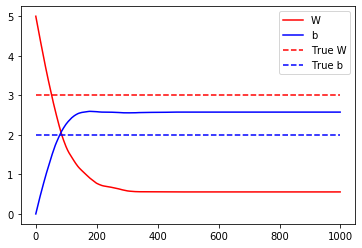

In [113]:
# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()


In [19]:
t1 = [1]
t2 = [2]
tf.concat([t1, t2], 0)


<tf.Tensor: id=1217, shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>

In [2]:
import pandas as pd

In [20]:
df = pd.read_csv('df_list.csv')
backup_df = df.copy()
del df['Unnamed: 0']
#del df['y']
for column in df.columns:
    if column == 'y':
        continue
    df[column] = df[column].astype('float32')

df.to_csv('df_keras_list.csv', index=False)

In [21]:
df_path = '/Users/billymosse/Projects/git/github/MESSI/code/df_keras_list.csv'

In [22]:
label_name = 'y'
batch_size = 256

In [23]:
train_dataset = tf.data.experimental.make_csv_dataset(
    df_path,
    batch_size,
    label_name=label_name,
    field_delim=',',
    shuffle=True,
    num_epochs=1,
    #column_defaults= ['int32'] *101,
    header=True)

In [147]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [25]:
features, labels = next(iter(train_dataset))


In [26]:
features

OrderedDict([('M_0', <tf.Tensor: id=1167, shape=(256,), dtype=float32, numpy=
              array([ 2.,  2.,  1., -1.,  1.,  1.,  2., -1.,  2.,  2.,  2.,  1., -1.,
                      1.,  1.,  2., -1.,  0.,  1.,  1.,  0.,  1.,  2.,  1., -1., -1.,
                      2.,  1.,  0.,  0.,  0., -1.,  2.,  1.,  2.,  0.,  1.,  1.,  2.,
                      2.,  0.,  1., -1., -1.,  2.,  1., -1.,  1.,  2.,  0.,  0.,  1.,
                      0., -1.,  0.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  0.,  1.,
                      1.,  2.,  1.,  0., -1.,  0.,  0.,  2.,  0.,  2., -1.,  0.,  2.,
                      0.,  1.,  0.,  2., -1.,  2.,  2., -1.,  0., -1., -1.,  0.,  0.,
                     -1.,  2.,  2.,  1.,  0.,  2., -1., -1.,  2.,  2.,  1., -1., -1.,
                      2.,  2., -1., -1.,  1., -1.,  1.,  0.,  2.,  0., -1., -1.,  1.,
                      1.,  2.,  2.,  0.,  0.,  2.,  0.,  0.,  2., -1.,  2.,  2.,  2.,
                      0.,  0., -1.,  1., -1., -1.,  0.,  2., -

In [27]:
labels

<tf.Tensor: id=1227, shape=(256,), dtype=string, numpy=
array([b'[(-1, -1, -1, -1, -1, -1, -1, -1, 1, -1), (-1, -1, -1, -1, -1, -1, -1, 1, 1, -1), (-1, -1, -1, -1, -1, -1, 1, -1, -1, -1), (-1, -1, -1, -1, -1, -1, 1, -1, -1, 1), (-1, -1, -1, -1, -1, -1, 1, -1, 1, -1), (-1, -1, -1, -1, -1, -1, 1, -1, 1, 1), (-1, -1, -1, -1, -1, -1, 1, 1, -1, -1), (-1, -1, -1, -1, -1, -1, 1, 1, -1, 1), (-1, -1, -1, -1, -1, -1, 1, 1, 1, -1), (-1, -1, -1, -1, -1, -1, 1, 1, 1, 1), (-1, -1, -1, -1, -1, 1, 1, -1, -1, 1), (-1, -1, -1, -1, -1, 1, 1, -1, 1, -1), (-1, -1, -1, -1, -1, 1, 1, -1, 1, 1), (-1, -1, -1, -1, -1, 1, 1, 1, -1, 1), (-1, -1, -1, -1, -1, 1, 1, 1, 1, 1), (-1, -1, -1, -1, 1, -1, 1, -1, -1, -1), (-1, -1, -1, -1, 1, -1, 1, -1, -1, 1), (-1, -1, -1, -1, 1, -1, 1, -1, 1, -1), (-1, -1, -1, -1, 1, 1, 1, -1, -1, -1), (-1, -1, -1, -1, 1, 1, 1, -1, -1, 1), (-1, -1, -1, -1, 1, 1, 1, -1, 1, -1), (-1, -1, -1, -1, 1, 1, 1, -1, 1, 1), (-1, -1, -1, -1, 1, 1, 1, 1, -1, 1), (-1, -1, -1, 1, -1, 1, 1, 1, -1, 1), (-

In [28]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [29]:
train_dataset = train_dataset.map(pack_features_vector)

In [31]:
#for col in df.columns:
#    print(df[col].dtype)

In [35]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [37]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [42]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('y')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [43]:
batch_size = 5 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [44]:
feature_columns_names = df.columns[1:]
feature_columns = []
for header in feature_columns_names:
  feature_columns.append(feature_column.numeric_column(header))


In [47]:
def min_distance_loss(predicted_y, target_y):
    return 1
    '''#target_y tiene 2 valores en cada columna
    duplicated_predicted_y = tf.concat([predicted_y] * 3, -1)
    
    #Hack que no entiendo por que lo necesito
    duplicated_predicted_y = tf.reshape(duplicated_predicted_y, [1000, 3, 3])
    distances = tf.abs(target_y - duplicated_predicted_y)
    print("distances", distances)
    mean_distance =  tf.reduce_mean(tf.reduce_min(distances, axis=1))
    print("mean distance", mean_distance)
    return mean_distance'''



model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss=min_distance_loss,
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=5)

TypeError: Value passed to parameter 'x' has DataType int32 not in list of allowed values: float16, float32, float64, complex64, complex128

In [59]:
df.y.apply(lambda x : pd.to_numeric(x))

ValueError: Unable to parse string "[(-1, -1, -1, -1, -1, -1, -1, -1, -1, -1), (-1, -1, -1, -1, -1, -1, 1, -1, -1, -1), (-1, -1, -1, -1, -1, -1, 1, 1, -1, -1), (-1, -1, -1, -1, -1, 1, -1, -1, -1, -1), (-1, -1, -1, -1, 1, -1, -1, -1, -1, -1), (-1, -1, -1, -1, 1, -1, 1, -1, -1, -1), (-1, -1, -1, -1, 1, -1, 1, 1, -1, -1), (-1, -1, -1, -1, 1, 1, -1, -1, -1, -1), (-1, -1, -1, -1, 1, 1, 1, -1, -1, -1), (-1, -1, -1, 1, -1, -1, 1, -1, -1, -1), (-1, -1, -1, 1, -1, -1, 1, 1, -1, -1), (-1, -1, 1, -1, 1, -1, 1, -1, -1, 1), (-1, -1, 1, -1, 1, 1, -1, -1, 1, 1), (-1, -1, 1, -1, 1, 1, -1, 1, 1, 1), (-1, -1, 1, 1, -1, -1, 1, -1, -1, 1), (-1, -1, 1, 1, -1, -1, 1, 1, -1, 1), (-1, -1, 1, 1, -1, -1, 1, 1, 1, 1), (-1, -1, 1, 1, 1, 1, -1, -1, 1, 1), (-1, -1, 1, 1, 1, 1, -1, 1, 1, 1), (-1, 1, -1, -1, -1, -1, -1, -1, -1, -1), (-1, 1, -1, -1, -1, -1, -1, -1, 1, -1), (-1, 1, -1, -1, -1, -1, -1, 1, -1, -1), (-1, 1, -1, -1, -1, -1, 1, -1, -1, -1), (-1, 1, -1, -1, -1, -1, 1, 1, -1, -1), (-1, 1, -1, -1, 1, -1, -1, -1, -1, -1), (-1, 1, -1, -1, 1, -1, 1, -1, -1, -1), (-1, 1, -1, -1, 1, -1, 1, -1, 1, -1), (-1, 1, -1, -1, 1, -1, 1, 1, -1, -1), (-1, 1, -1, -1, 1, -1, 1, 1, 1, -1), (-1, 1, -1, -1, 1, 1, -1, -1, -1, -1), (-1, 1, -1, -1, 1, 1, -1, -1, 1, -1), (-1, 1, -1, -1, 1, 1, -1, 1, 1, -1), (-1, 1, -1, -1, 1, 1, 1, -1, -1, -1), (-1, 1, -1, -1, 1, 1, 1, -1, 1, -1), (-1, 1, -1, -1, 1, 1, 1, 1, 1, -1), (-1, 1, -1, 1, -1, -1, -1, 1, 1, -1), (-1, 1, -1, 1, -1, -1, 1, -1, -1, -1), (-1, 1, -1, 1, -1, -1, 1, 1, -1, -1), (-1, 1, -1, 1, -1, -1, 1, 1, 1, -1), (-1, 1, -1, 1, -1, 1, -1, 1, 1, -1), (-1, 1, -1, 1, -1, 1, 1, 1, 1, -1), (-1, 1, 1, -1, 1, -1, 1, 1, 1, 1), (-1, 1, 1, -1, 1, 1, -1, -1, 1, 1), (-1, 1, 1, -1, 1, 1, -1, 1, 1, 1), (-1, 1, 1, -1, 1, 1, 1, -1, 1, 1), (-1, 1, 1, -1, 1, 1, 1, 1, 1, 1), (-1, 1, 1, 1, -1, -1, 1, 1, 1, 1), (-1, 1, 1, 1, -1, 1, -1, 1, 1, 1), (-1, 1, 1, 1, -1, 1, 1, 1, 1, 1), (-1, 1, 1, 1, 1, -1, 1, 1, 1, 1), (-1, 1, 1, 1, 1, 1, -1, 1, 1, 1), (-1, 1, 1, 1, 1, 1, 1, 1, 1, 1), (1, -1, -1, -1, -1, -1, -1, -1, -1, -1), (1, -1, -1, -1, -1, -1, 1, -1, -1, -1), (1, -1, -1, -1, -1, 1, -1, -1, -1, -1), (1, -1, -1, -1, 1, -1, -1, -1, -1, -1), (1, -1, -1, -1, 1, -1, 1, -1, -1, -1), (1, -1, -1, -1, 1, 1, -1, -1, -1, -1), (1, -1, -1, 1, -1, -1, -1, -1, -1, -1), (1, -1, -1, 1, -1, -1, -1, 1, -1, -1), (1, -1, -1, 1, -1, -1, 1, -1, -1, -1), (1, -1, -1, 1, -1, -1, 1, 1, -1, -1), (1, -1, -1, 1, -1, 1, -1, -1, -1, -1), (1, -1, 1, -1, 1, -1, -1, -1, -1, 1), (1, -1, 1, -1, 1, -1, 1, -1, -1, 1), (1, -1, 1, -1, 1, 1, -1, -1, -1, 1), (1, -1, 1, -1, 1, 1, -1, -1, 1, 1), (1, -1, 1, -1, 1, 1, -1, 1, 1, 1), (1, -1, 1, -1, 1, 1, 1, -1, -1, 1), (1, -1, 1, 1, -1, -1, -1, -1, -1, 1), (1, -1, 1, 1, -1, -1, -1, 1, -1, 1), (1, -1, 1, 1, -1, -1, -1, 1, 1, 1), (1, -1, 1, 1, -1, -1, 1, -1, -1, 1), (1, -1, 1, 1, -1, -1, 1, 1, -1, 1), (1, -1, 1, 1, -1, -1, 1, 1, 1, 1), (1, -1, 1, 1, -1, 1, -1, -1, -1, 1), (1, -1, 1, 1, -1, 1, -1, -1, 1, 1), (1, -1, 1, 1, -1, 1, -1, 1, -1, 1), (1, -1, 1, 1, -1, 1, -1, 1, 1, 1), (1, -1, 1, 1, -1, 1, 1, 1, 1, 1), (1, -1, 1, 1, 1, 1, -1, -1, 1, 1), (1, -1, 1, 1, 1, 1, -1, 1, 1, 1), (1, -1, 1, 1, 1, 1, 1, -1, 1, 1), (1, -1, 1, 1, 1, 1, 1, 1, -1, 1), (1, -1, 1, 1, 1, 1, 1, 1, 1, 1), (1, 1, -1, -1, -1, -1, 1, -1, -1, -1), (1, 1, -1, -1, -1, -1, 1, 1, -1, -1), (1, 1, -1, -1, 1, 1, -1, -1, -1, -1), (1, 1, -1, -1, 1, 1, -1, -1, 1, -1), (1, 1, -1, -1, 1, 1, -1, 1, 1, -1), (1, 1, -1, 1, -1, -1, 1, -1, -1, -1), (1, 1, -1, 1, -1, -1, 1, 1, -1, -1), (1, 1, -1, 1, -1, 1, -1, 1, 1, -1), (1, 1, 1, -1, 1, 1, -1, -1, 1, 1), (1, 1, 1, -1, 1, 1, -1, 1, 1, 1), (1, 1, 1, 1, -1, -1, -1, 1, 1, 1), (1, 1, 1, 1, -1, -1, 1, 1, 1, 1), (1, 1, 1, 1, -1, 1, -1, -1, 1, 1), (1, 1, 1, 1, -1, 1, -1, 1, 1, 1), (1, 1, 1, 1, -1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, -1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, -1, -1, 1, 1), (1, 1, 1, 1, 1, 1, -1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1, 1, 1)]" at position 0

ValueError: Unable to parse string "[(-1, -1, -1, -1, -1, -1, -1, -1, -1, -1), (-1, -1, -1, -1, -1, -1, 1, -1, -1, -1), (-1, -1, -1, -1, -1, -1, 1, 1, -1, -1), (-1, -1, -1, -1, -1, 1, -1, -1, -1, -1), (-1, -1, -1, -1, 1, -1, -1, -1, -1, -1), (-1, -1, -1, -1, 1, -1, 1, -1, -1, -1), (-1, -1, -1, -1, 1, -1, 1, 1, -1, -1), (-1, -1, -1, -1, 1, 1, -1, -1, -1, -1), (-1, -1, -1, -1, 1, 1, 1, -1, -1, -1), (-1, -1, -1, 1, -1, -1, 1, -1, -1, -1), (-1, -1, -1, 1, -1, -1, 1, 1, -1, -1), (-1, -1, 1, -1, 1, -1, 1, -1, -1, 1), (-1, -1, 1, -1, 1, 1, -1, -1, 1, 1), (-1, -1, 1, -1, 1, 1, -1, 1, 1, 1), (-1, -1, 1, 1, -1, -1, 1, -1, -1, 1), (-1, -1, 1, 1, -1, -1, 1, 1, -1, 1), (-1, -1, 1, 1, -1, -1, 1, 1, 1, 1), (-1, -1, 1, 1, 1, 1, -1, -1, 1, 1), (-1, -1, 1, 1, 1, 1, -1, 1, 1, 1), (-1, 1, -1, -1, -1, -1, -1, -1, -1, -1), (-1, 1, -1, -1, -1, -1, -1, -1, 1, -1), (-1, 1, -1, -1, -1, -1, -1, 1, -1, -1), (-1, 1, -1, -1, -1, -1, 1, -1, -1, -1), (-1, 1, -1, -1, -1, -1, 1, 1, -1, -1), (-1, 1, -1, -1, 1, -1, -1, -1, -1, -1), (-1, 1, -1, -1, 1, -1, 1, -1, -1, -1), (-1, 1, -1, -1, 1, -1, 1, -1, 1, -1), (-1, 1, -1, -1, 1, -1, 1, 1, -1, -1), (-1, 1, -1, -1, 1, -1, 1, 1, 1, -1), (-1, 1, -1, -1, 1, 1, -1, -1, -1, -1), (-1, 1, -1, -1, 1, 1, -1, -1, 1, -1), (-1, 1, -1, -1, 1, 1, -1, 1, 1, -1), (-1, 1, -1, -1, 1, 1, 1, -1, -1, -1), (-1, 1, -1, -1, 1, 1, 1, -1, 1, -1), (-1, 1, -1, -1, 1, 1, 1, 1, 1, -1), (-1, 1, -1, 1, -1, -1, -1, 1, 1, -1), (-1, 1, -1, 1, -1, -1, 1, -1, -1, -1), (-1, 1, -1, 1, -1, -1, 1, 1, -1, -1), (-1, 1, -1, 1, -1, -1, 1, 1, 1, -1), (-1, 1, -1, 1, -1, 1, -1, 1, 1, -1), (-1, 1, -1, 1, -1, 1, 1, 1, 1, -1), (-1, 1, 1, -1, 1, -1, 1, 1, 1, 1), (-1, 1, 1, -1, 1, 1, -1, -1, 1, 1), (-1, 1, 1, -1, 1, 1, -1, 1, 1, 1), (-1, 1, 1, -1, 1, 1, 1, -1, 1, 1), (-1, 1, 1, -1, 1, 1, 1, 1, 1, 1), (-1, 1, 1, 1, -1, -1, 1, 1, 1, 1), (-1, 1, 1, 1, -1, 1, -1, 1, 1, 1), (-1, 1, 1, 1, -1, 1, 1, 1, 1, 1), (-1, 1, 1, 1, 1, -1, 1, 1, 1, 1), (-1, 1, 1, 1, 1, 1, -1, 1, 1, 1), (-1, 1, 1, 1, 1, 1, 1, 1, 1, 1), (1, -1, -1, -1, -1, -1, -1, -1, -1, -1), (1, -1, -1, -1, -1, -1, 1, -1, -1, -1), (1, -1, -1, -1, -1, 1, -1, -1, -1, -1), (1, -1, -1, -1, 1, -1, -1, -1, -1, -1), (1, -1, -1, -1, 1, -1, 1, -1, -1, -1), (1, -1, -1, -1, 1, 1, -1, -1, -1, -1), (1, -1, -1, 1, -1, -1, -1, -1, -1, -1), (1, -1, -1, 1, -1, -1, -1, 1, -1, -1), (1, -1, -1, 1, -1, -1, 1, -1, -1, -1), (1, -1, -1, 1, -1, -1, 1, 1, -1, -1), (1, -1, -1, 1, -1, 1, -1, -1, -1, -1), (1, -1, 1, -1, 1, -1, -1, -1, -1, 1), (1, -1, 1, -1, 1, -1, 1, -1, -1, 1), (1, -1, 1, -1, 1, 1, -1, -1, -1, 1), (1, -1, 1, -1, 1, 1, -1, -1, 1, 1), (1, -1, 1, -1, 1, 1, -1, 1, 1, 1), (1, -1, 1, -1, 1, 1, 1, -1, -1, 1), (1, -1, 1, 1, -1, -1, -1, -1, -1, 1), (1, -1, 1, 1, -1, -1, -1, 1, -1, 1), (1, -1, 1, 1, -1, -1, -1, 1, 1, 1), (1, -1, 1, 1, -1, -1, 1, -1, -1, 1), (1, -1, 1, 1, -1, -1, 1, 1, -1, 1), (1, -1, 1, 1, -1, -1, 1, 1, 1, 1), (1, -1, 1, 1, -1, 1, -1, -1, -1, 1), (1, -1, 1, 1, -1, 1, -1, -1, 1, 1), (1, -1, 1, 1, -1, 1, -1, 1, -1, 1), (1, -1, 1, 1, -1, 1, -1, 1, 1, 1), (1, -1, 1, 1, -1, 1, 1, 1, 1, 1), (1, -1, 1, 1, 1, 1, -1, -1, 1, 1), (1, -1, 1, 1, 1, 1, -1, 1, 1, 1), (1, -1, 1, 1, 1, 1, 1, -1, 1, 1), (1, -1, 1, 1, 1, 1, 1, 1, -1, 1), (1, -1, 1, 1, 1, 1, 1, 1, 1, 1), (1, 1, -1, -1, -1, -1, 1, -1, -1, -1), (1, 1, -1, -1, -1, -1, 1, 1, -1, -1), (1, 1, -1, -1, 1, 1, -1, -1, -1, -1), (1, 1, -1, -1, 1, 1, -1, -1, 1, -1), (1, 1, -1, -1, 1, 1, -1, 1, 1, -1), (1, 1, -1, 1, -1, -1, 1, -1, -1, -1), (1, 1, -1, 1, -1, -1, 1, 1, -1, -1), (1, 1, -1, 1, -1, 1, -1, 1, 1, -1), (1, 1, 1, -1, 1, 1, -1, -1, 1, 1), (1, 1, 1, -1, 1, 1, -1, 1, 1, 1), (1, 1, 1, 1, -1, -1, -1, 1, 1, 1), (1, 1, 1, 1, -1, -1, 1, 1, 1, 1), (1, 1, 1, 1, -1, 1, -1, -1, 1, 1), (1, 1, 1, 1, -1, 1, -1, 1, 1, 1), (1, 1, 1, 1, -1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, -1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, -1, -1, 1, 1), (1, 1, 1, 1, 1, 1, -1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1, 1, 1)]" at position 0

In [63]:
from ast import literal_eval
df2 = pd.read_csv('df_keras_list.csv', sep=',', converters=dict(y=literal_eval))

In [68]:
df2.y.values[0][0][0]

-1

Esto no me sirve igual....tengo que trabajar con los labels

In [69]:
labels

<tf.Tensor: id=1227, shape=(256,), dtype=string, numpy=
array([b'[(-1, -1, -1, -1, -1, -1, -1, -1, 1, -1), (-1, -1, -1, -1, -1, -1, -1, 1, 1, -1), (-1, -1, -1, -1, -1, -1, 1, -1, -1, -1), (-1, -1, -1, -1, -1, -1, 1, -1, -1, 1), (-1, -1, -1, -1, -1, -1, 1, -1, 1, -1), (-1, -1, -1, -1, -1, -1, 1, -1, 1, 1), (-1, -1, -1, -1, -1, -1, 1, 1, -1, -1), (-1, -1, -1, -1, -1, -1, 1, 1, -1, 1), (-1, -1, -1, -1, -1, -1, 1, 1, 1, -1), (-1, -1, -1, -1, -1, -1, 1, 1, 1, 1), (-1, -1, -1, -1, -1, 1, 1, -1, -1, 1), (-1, -1, -1, -1, -1, 1, 1, -1, 1, -1), (-1, -1, -1, -1, -1, 1, 1, -1, 1, 1), (-1, -1, -1, -1, -1, 1, 1, 1, -1, 1), (-1, -1, -1, -1, -1, 1, 1, 1, 1, 1), (-1, -1, -1, -1, 1, -1, 1, -1, -1, -1), (-1, -1, -1, -1, 1, -1, 1, -1, -1, 1), (-1, -1, -1, -1, 1, -1, 1, -1, 1, -1), (-1, -1, -1, -1, 1, 1, 1, -1, -1, -1), (-1, -1, -1, -1, 1, 1, 1, -1, -1, 1), (-1, -1, -1, -1, 1, 1, 1, -1, 1, -1), (-1, -1, -1, -1, 1, 1, 1, -1, 1, 1), (-1, -1, -1, -1, 1, 1, 1, 1, -1, 1), (-1, -1, -1, 1, -1, 1, 1, 1, -1, 1), (-

Son strings....tengo que hacerlos un tensor de tamaño adecuado

In [71]:
INFINITY =tf.constant(np.infty)

In [84]:
INFINITY_ORTHANT = tf.convert_to_tensor([INFINITY] * 8)

In [87]:
INFINITY_ORTHANT = tf.reshape(INFINITY_ORTHANT, [1,8])
INFINITY_ORTHANT.shape

TensorShape([1, 8])

In [88]:
INFINITY_ORTHANT

<tf.Tensor: id=6843, shape=(1, 8), dtype=float32, numpy=array([[inf, inf, inf, inf, inf, inf, inf, inf]], dtype=float32)>

In [129]:
L = (str(tf.convert_to_tensor(labels[0]).numpy()[0:-1])[1:-1] + "]'")[1:-1]

In [132]:
labels_int = []
for label in labels:
    L = (str(tf.convert_to_tensor(label).numpy()[0:-1])[1:-1] + "]'")[1:-1]
    labels_int.append(literal_eval(L))

In [138]:
max_len = 0
for l in labels_int:
    max_len = max(max_len, len(l))
max_len

206

In [139]:
for l in labels_int:
    while len(l) < max_len:
        l.append(INFINITY_ORTHANT)

In [145]:
np.array(labels_int)

(256, 206)

In [146]:
len(df)

1649

Mejor uso #https://www.tensorflow.org/tutorials/load_data/pandas_dataframe

In [178]:
df = pd.read_csv('df_keras_list.csv')
df.head(1)

,y,M_0,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,...,B_30,B_31,B_32,B_33,B_34,B_35,B_36,B_37,B_38,B_39
0,"[(-1, -1, -1, -1, -1, -1, -1, -1, -1, -1), (-1...",0.0,2.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,...,1.0,-1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0


In [183]:
df['target'] = 0

In [184]:
def convert(label):
    L = (str(tf.convert_to_tensor(label).numpy()[0:-1])[1:-1] + "]'")[1:-1]
    L = (literal_eval(L))
    while len(L) < max_len:
        L.append(INFINITY_ORTHANT)
    return np.asarray(L)
df.target = df.y.apply(lambda val : convert(val))

In [187]:
target = df.pop('target')

In [188]:
target

0       [(-1, -1, -1, -1, -1, -1, -1, -1, -1, -1), (-1...
1       [(-1, -1, -1, -1, 1, 1, 1, -1, -1, -1), (-1, -...
2       [(-1, -1, -1, -1, -1, -1, -1, -1, -1, -1), (-1...
3       [(-1, -1, -1, -1, -1, 1, 1, 1, -1, -1), (-1, -...
4       [(-1, -1, -1, -1, -1, -1, -1, -1, -1, -1), (-1...
                              ...                        
1644    [(-1, -1, -1, -1, -1, -1, -1, -1, -1, -1), (-1...
1645    [(-1, -1, -1, -1, -1, -1, -1, -1, -1, -1), (-1...
1646    [(-1, -1, -1, -1, -1, -1, -1, -1, -1, -1), (-1...
1647    [(-1, -1, -1, -1, -1, -1, -1, -1, -1, -1), (-1...
1648    [(-1, -1, -1, -1, 1, -1, 1, 1, 1, 1), (-1, -1,...
Name: target, Length: 1649, dtype: object

In [193]:
type(target[0])

numpy.ndarray

In [194]:
del df['y']

KeyError: 'y'

In [195]:
dataset = tf.data.Dataset.from_tensor_slices((df.values, np.asarray(target.values)))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

IUPI IUPI YEAH YEAH

In [169]:
for feat, targ in dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [ 0.  2.  0.  1.  2.  1.  2.  2.  0. -1.  0. -1.  0.  2. -1.  1. -1.  1.
  1.  0.  0.  2.  2.  1.  2.  1.  2.  1.  2. -1.  0.  1. -1. -1.  0. -1.
  2.  1. -1.  2.  1. -1.  0. -1.  0.  1.  1.  0. -1.  0.  0.  2. -1. -1.
  2.  0.  0.  1.  1.  2.  1.  2.  0.  1. -1. -1.  0.  2.  1.  0. -1.  2.
  0.  0.  0. -1.  2.  2.  1.  0. -1.  2.  0. -1.  1.  2. -1.  1.  1.  0.
  1. -1.  2.  2.  2.  2.  1.  2.  1.  1.], Target: 0
Features: [-1.  0.  1.  2. -1.  0. -1.  2.  1.  2.  2.  0. -1.  0.  2.  0. -1.  2.
 -1.  2.  1.  0.  2.  2. -1.  2.  1. -1.  1. -1.  0.  1.  2.  0. -1.  0.
  2.  2.  2.  1.  0.  2. -1.  1. -1.  2.  1.  0. -1.  2.  2.  0. -1. -1.
  2. -1.  2.  0.  0.  2.  2. -1.  1.  1.  2.  2.  1. -1.  1.  1.  0.  0.
  1. -1. -1.  0.  0. -1.  0.  1.  2.  0.  0.  2.  0.  0. -1.  1.  0. -1.
 -1. -1.  1.  2.  2.  2.  1. -1.  0.  0.], Target: 0
Features: [ 2.  1. -1.  2. -1.  2.  2. -1.  1.  0.  2.  2. -1.  0. -1.  2. -1. -1.
  2.  0.  0. -1.  0.  1. -1.  2. -1.  1. -1. -1. -1.  0. -1. 

In [177]:
target[1]

0